# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

import string

import spacy
nlp = spacy.load('en_core_web_sm')

import nltk
from nltk import tokenize

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

from flask import Flask, redirect, url_for, request,render_template

pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', 80)

import csv

# Predefining some functions

In [3]:
def get_url(x):
    template = 'https://www.amazon.in/s?k='
    url = template + x
    return url

def add_page(url,x):
    page_link = url + '&page=' + str(x)
    return page_link

def extract_record(item):
    
    "description and url"
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.in' + atag.get('href')
    
    "price"
    try:
        price_parent = item.find('span', 'a-price')
        price = price_parent.find('span', 'a-offscreen').text
    except AttributeError:
        return
    
    "rating and review count"
    try:
        rating = item.i.text
        review_count = item.find('span', {'class':'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count ='' 
    
    result = (description, price, rating, review_count, url)
    
    return result

def main(search_term):
    "Run main program routine"
    
    "starting up the web driver"
    driver = webdriver.Chrome(ChromeDriverManager().install())
    
    records=[]
    
    url = get_url(search_term)
    
    for page in range(1,6):
        
        link = add_page(url,page)
        
        driver.get(link)
        
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        results = soup.find_all('div', {'data-component-type': 's-search-result'})
        
        for item in results:
            record = extract_record(item)
            if record:
                records.append(record)
    driver.close()
    
    "Saving the data in csv"
    with open('search_results.csv','w', newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Description','Price','Rating','Review_Count','URL'])
        writer.writerows(records)

# Search term input

In [4]:
search_term = input('Search for product on Amazon.com :\n')
search_term = search_term.strip()
search_term = search_term.replace(' ','+')

Search for product on Amazon.com :
boat tws


# Searching for the search_term by calling main function

In [5]:
main(search_term)



====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\azhar\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


# Importing dataset

In [6]:
data = pd.read_csv('search_results.csv')
data = data.dropna()
data = data.reset_index(drop =True)
for i in range (0,len(data)):
    data.Review_Count[i] = data.Review_Count[i].replace(',','')
data.Review_Count = pd.to_numeric(data['Review_Count'])
index_names = data[data['Review_Count'] < 11 ].index
data.drop(index_names, inplace = True)
data = data.drop_duplicates(subset=['URL'])
data = data.drop_duplicates(subset=['Description'])
data = data.reset_index(drop =True)
data

,Description,Price,Rating,Review_Count,URL
0,"boAt Airdopes 441 TWS Ear-Buds with IWP Technology, Immersive Audio, Up to 3...","₹1,799",4.0 out of 5 stars,102497,https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_s...
1,"boAt Airdopes 621 TWS Earbuds with 150 Hours Battery, Digital Battery Indica...","₹1,999",3.7 out of 5 stars,4021,https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_s...
2,"boAt Airdopes 121v2 TWS Earbuds with Bluetooth V5.0, Immersive Audio, Up to ...",₹899,3.8 out of 5 stars,49840,https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/dp/B08JQN...
3,"boAt Airdopes 441 TWS Ear-Buds with IWP Technology, Immersive Audio, Up to 3...","₹1,799",4.0 out of 5 stars,102497,https://www.amazon.in/Airdopes-441-Technology-Immersive-Resistance/dp/B086WM...
4,"boAt Airdopes 452 TWS Earbuds with Beast™ Mode for Low Latency, ENx Technolo...","₹1,299",2.7 out of 5 stars,24,https://www.amazon.in/boAt-Airdopes-452-Technology-Bluetooth/dp/B097GKVTX6/r...
5,"boAt Airdopes 121v2 TWS Earbuds with Bluetooth V5.0, Immersive Audio, Up to ...",₹899,3.8 out of 5 stars,49840,https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/dp/B08JQL...
6,"boAt Airdopes 121v2 TWS Earbuds with Bluetooth V5.0, Immersive Audio, Up to ...",₹899,3.8 out of 5 stars,49840,https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/dp/B08JQM...
7,"boAt Airdopes 441 Pro TWS Ear-Buds with IWP Technology, Up to 150H Playback ...","₹2,499",4.0 out of 5 stars,102497,https://www.amazon.in/Airdopes-441-Pro-Technology-Resistance/dp/B08CVT8Y53/r...
8,"boAt Airdopes 441 TWS Ear-Buds with IWP Technology, Immersive Audio, Up to 3...","₹1,799",4.0 out of 5 stars,102497,https://www.amazon.in/Airdopes-441-Technology-Immersive-Resistance/dp/B086WM...
9,"boAt Airdopes 441 TWS Ear-Buds with IWP Technology, Immersive Audio, Up to 3...","₹1,799",4.0 out of 5 stars,102497,https://www.amazon.in/Airdopes-441-Technology-Immersive-Resistance/dp/B086WN...


# Asking for index of desired product

In [9]:
index = int(input('Enter Item no. from the list above: \n'))
try:
    product_url = data.URL[index]
    print(product_url)
except:
    print('Product not found in the list!!!')

Enter Item no. from the list above: 
4
https://www.amazon.in/boAt-Airdopes-452-Technology-Bluetooth/dp/B097GKVTX6/ref=sr_1_6?dchild=1&keywords=boat+tws&qid=1633528251&sr=8-6


# Predifining functions for Extracting record

In [10]:
def get_review(product_page):
    
    driver = webdriver.Chrome(ChromeDriverManager().install())
    
    driver.get(product_page)
    
    soup = BeautifulSoup(driver.page_source,'html.parser')
    review_page = soup.find('a',{'data-hook':'see-all-reviews-link-foot'})
    review_link = review_page.get('href')
    
    template = 'https://amazon.in'
    url = template + review_link
    driver.close()
    new_main(url)
        
    return 

def new_extract_record(item):
    
    'profile name'
    try:
        name = item.find('div',{'class':'a-profile-content'}).text.strip()
    except AttributeError:
        return
    
    'rating'
    try:
        itag = item.i
        rating = itag.text.replace('out of 5 stars','').strip()
    except AttributeError:
        return
    
    'Review title'
    try:
        review_title = item.find('a',{'data-hook':'review-title'}).text.strip()
    except AttributeError:
        return
    
    'Review Body'
    try:
        body = item.find('span',{'data-hook':'review-body'}).text.strip()
    except AttributeError:
        return
    
    result = (name,rating,review_title,body)
    
    return result

def calculate_sentiment(text: str = None):
        sent_score = 0
        if text:
            sentence = nlp(text)
            for word in sentence:
                sent_score += sentiment_lexicon.get(word.lemma_,0)
        return sent_score

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");    
    
def new_main(url):
    
    driver = webdriver.Chrome(ChromeDriverManager().install())
    
    records=[]
    
    url += '&pageNumber={}'
    
    for page in range(1,999999):
        #https://www.amazon.in/New-Apple-iPhone-Pro-128GB/product-reviews/
        #B08L5VZKWT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
                
        driver.get(url.format(page))
        
        soup = BeautifulSoup(driver.page_source, 'html.parser') 
        
        results = soup.find_all('div', {'data-hook':'review'})
        
        for item in results:
            record = new_extract_record(item)
            records.append(record)
        
        if not soup.find('li',{'class':'a-disabled a-last'}):
            pass
        else:
            break
    
    driver.close()
    
    
    "Saving the data in csv"
    with open('reviews.csv','w', newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Name','Rating','Review_Title','Review_Body'])
        writer.writerows(records)


# Calling get_review fuction

In [11]:
if str(data.Review_Count[index]) == 'nan':
    print('No reviews found!\nBe the first to order.')
else:
    get_review(product_url)
    



====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\azhar\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\azhar\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


# Sentiment Analysis on review dataset

In [12]:
review = pd.read_csv('reviews.csv')
review['review'] = review['Review_Title'] + ' ' + review['Review_Body']

df= pd.DataFrame(review.review)

for i in range (0,len(df)):
    df.review[i] = nltk.sent_tokenize(str(df.review[i]))
    
nlp = spacy.load('en_core_web_sm')

affin = pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')

affinity_scores = affin.set_index('word')['value'].to_dict()

sentiment_lexicon = affinity_scores

df['sentiment_value'] = 'nan'

for i in range(0,len(df)):
    sent_score = 0
    for sent in df['review'][i]:
        sent_score = calculate_sentiment(sent)
    df['sentiment_value'][i] = sent_score

df['word_count'] = 'nan'
for i in range(0,len(df)):
    length = 0
    for sent in df['review'][i]:
        length = length + len(sent.split(' '))
    df['word_count'][i] = length
    

review = review.drop('review',axis = 1)

df = df.drop('review',axis = 1)

data = review.join(df)

data.sentiment_value = pd.to_numeric(data['sentiment_value'])

data

,Name,Rating,Review_Title,Review_Body,sentiment_value,word_count
0,Sarthak,5.0,A great set of TWS....,"Sound quality is great, calling is great only if using it in a quiet place. ...",3,84
1,Shilpi,5.0,5 🌟🌟🌟🌟🌟,"To be honest, it took some time to explore and adjust the settings. Like 1 s...",0,45
2,Amazon Customer,4.0,Good Deal if buying is under Rs. 1500,These are my views after testing them for few hours:Pros:Sound quality is go...,0,88
3,mansi,5.0,awesome,best in price range remove the tape for better connect on earbuds,4,13
4,arvind,3.0,Average product. Expected from boat,Sound quality just ok and product quality is not upto the mark. Overall just...,0,25
5,Saurabh sharma,4.0,65 ms latency is the best part,Your browser does not support HTML5 video.\n\n\n Product is made in Vietna...,2,138
6,Onkar Vaidya,4.0,A very good choice for this budget for Wireless Earbuds.,I am a professional Music Producer. So I am very picky about audio devices. ...,3,106
7,Ashwin,1.0,"Worst product, won't recommend.","The sound quality is average. For the connection issue, i tried with 4 diffe...",0,108
8,Arun,1.0,Faulty product,"The right side bud wasn't responsive to touch, tried factory reset and still...",0,31
9,Dhpatel,1.0,Not worth to money,"Sound quality, connectivity to other call r very bad not good , even very h...",0,37


# EDA on data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             23 non-null     object 
 1   Rating           23 non-null     float64
 2   Review_Title     23 non-null     object 
 3   Review_Body      23 non-null     object 
 4   sentiment_value  23 non-null     int64  
 5   word_count       23 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ KB


In [14]:
data.sentiment_value.describe()

count    23.000000
mean      1.695652
std       3.722594
min      -4.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      12.000000
Name: sentiment_value, dtype: float64

We can conclude about the quality of the products by looking at the mean or 50% sentiment score.

# Plotting Word_Cloud

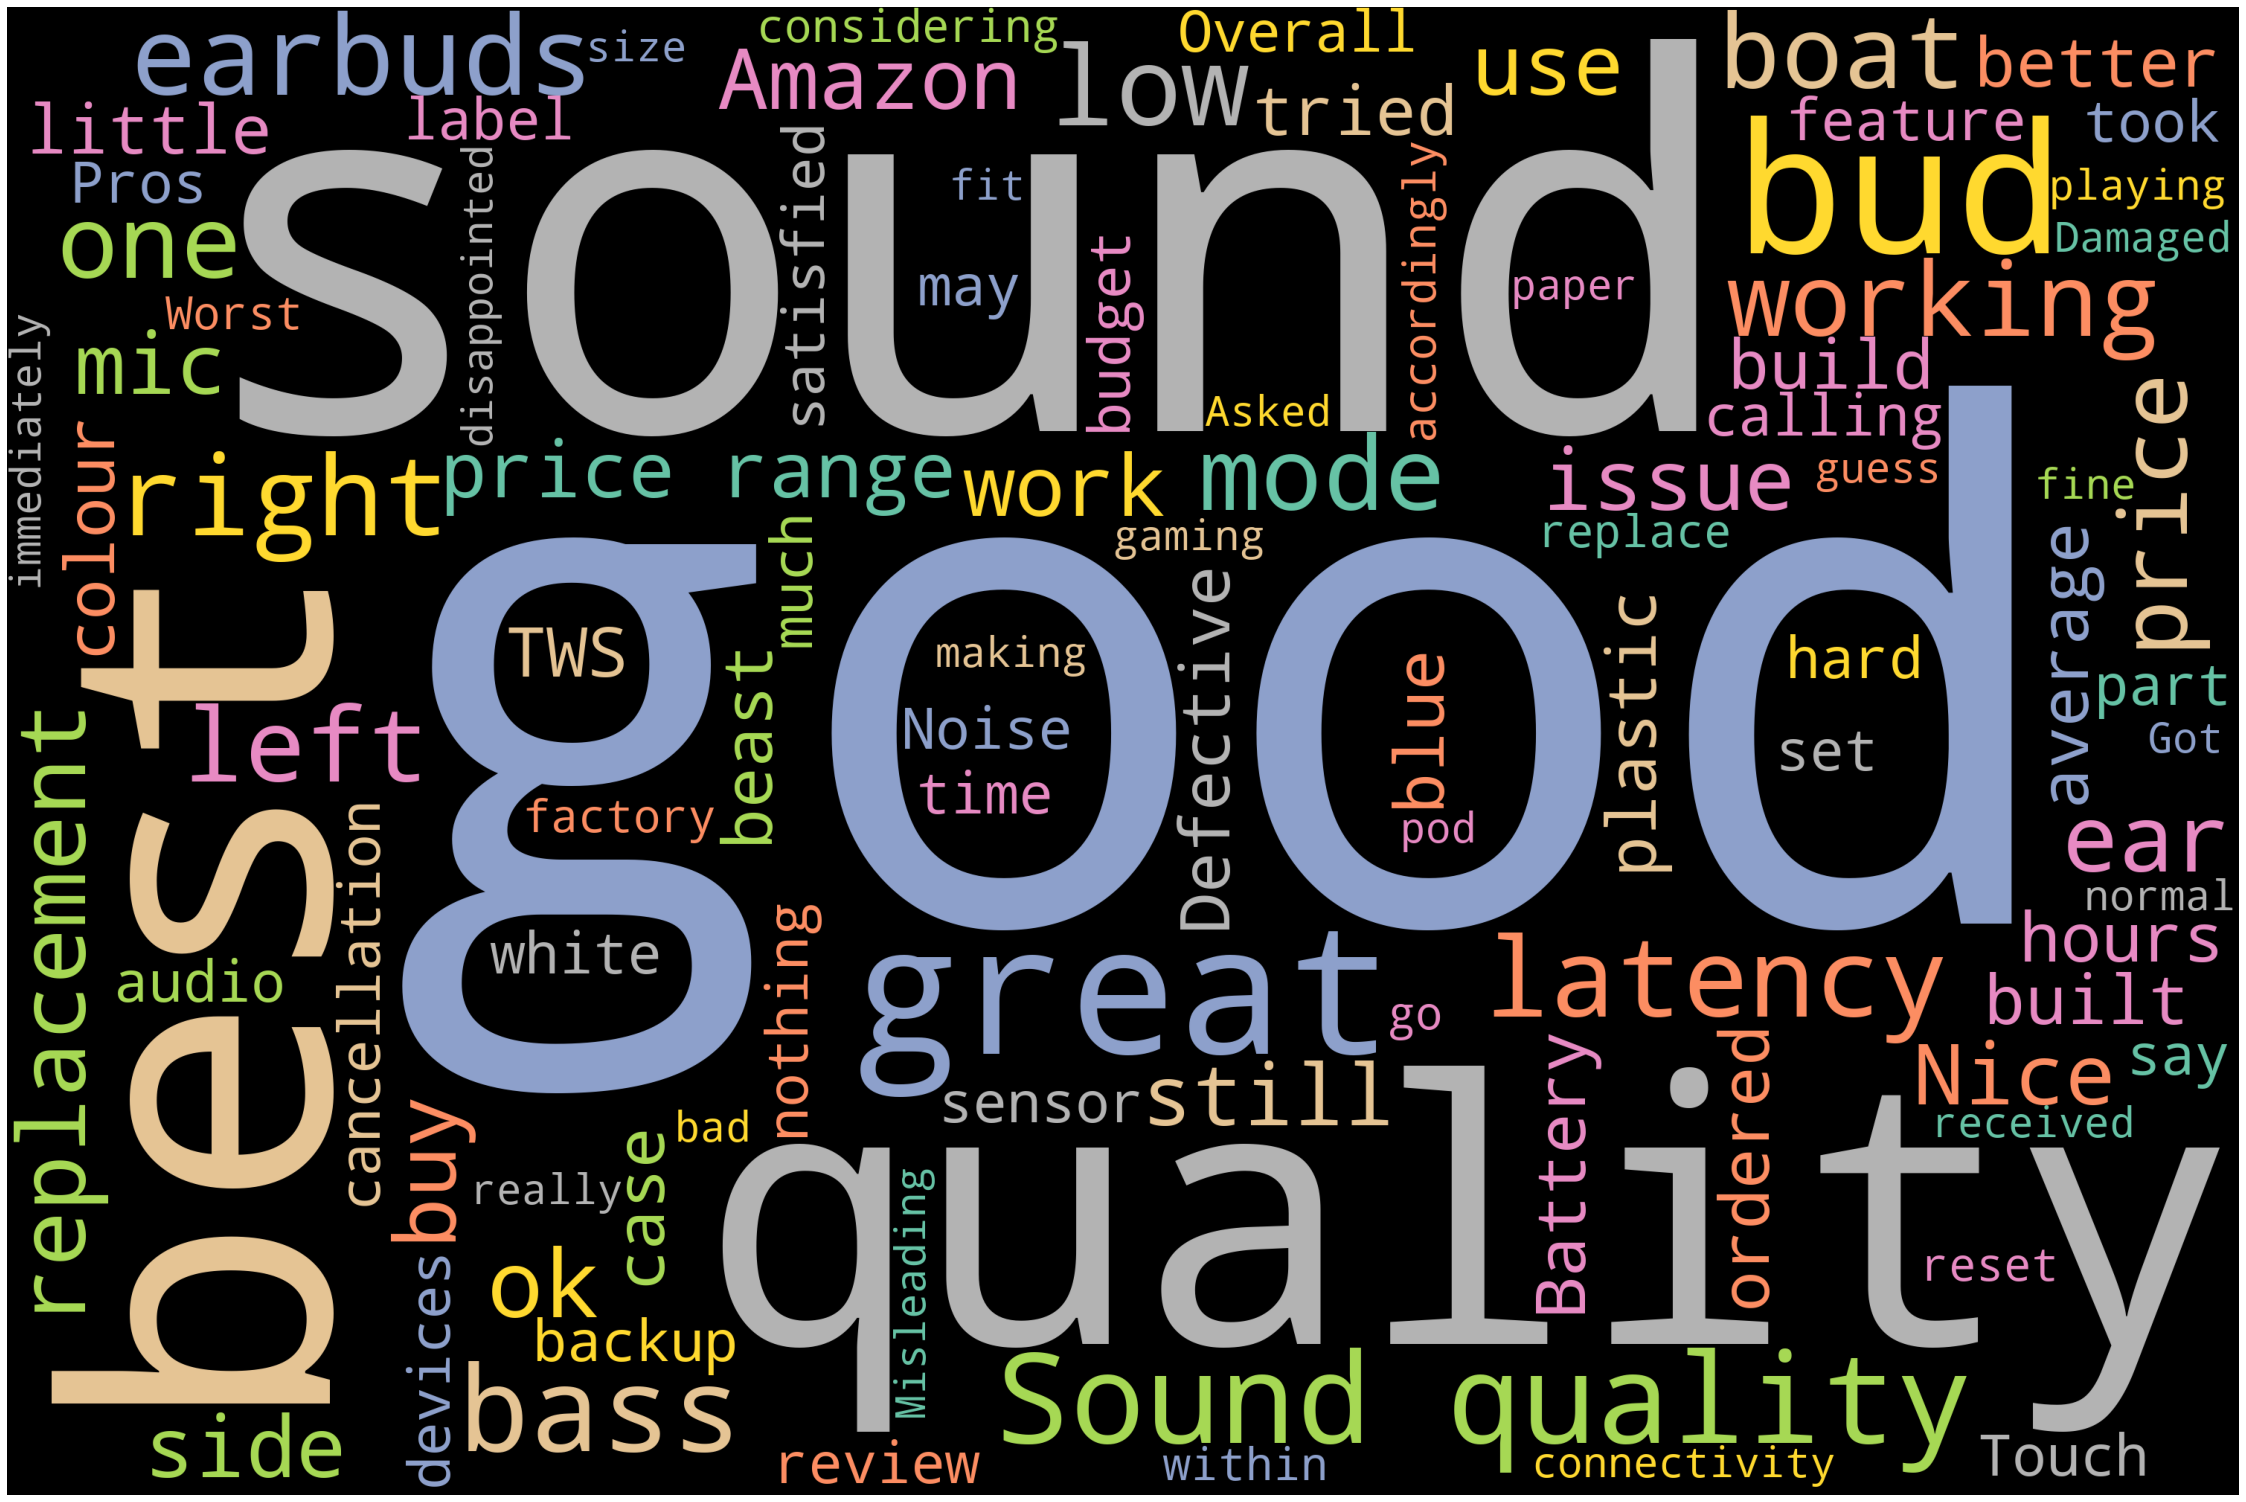

In [15]:
wc = pd.DataFrame()
wc['review'] = review['Review_Title'] + ' ' + review['Review_Body']

wc = [review.strip() for review in wc.review] 
wc = [review for review in wc if review]

text = ' '.join(wc)

stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('product')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Deployment Full code

In [3]:
import pandas as pd 
import numpy as np

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

import string

import spacy
nlp = spacy.load('en_core_web_sm')

import nltk
from nltk import tokenize

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

from flask import Flask, redirect, url_for, request,render_template

pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', 80)

import csv

affin = pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')

affinity_scores = affin.set_index('word')['value'].to_dict()

sentiment_lexicon = affinity_scores

def get_url(x):
    template = 'https://www.amazon.in/s?k='
    url = template + x
    return url

def add_page(url,x):
    page_link = url + '&page=' + str(x)
    return page_link

def extract_record(item):
    
    "description and url"
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.in' + atag.get('href')
    
    "price"
    try:
        price_parent = item.find('span', 'a-price')
        price = price_parent.find('span', 'a-offscreen').text
    except AttributeError:
        return
    
    "rating and review count"
    try:
        rating = item.i.text
        review_count = item.find('span', {'class':'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count ='' 
    
    result = (description, price, rating, review_count, url)
    
    return result

def main(search_term):
    "Run main program routine"
    
    "starting up the web driver"
    driver = webdriver.Chrome(ChromeDriverManager().install())
    
    records=[]
    
    url = get_url(search_term)
    
    for page in range(1,6):
        
        link = add_page(url,page)
        
        driver.get(link)
        
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        results = soup.find_all('div', {'data-component-type': 's-search-result'})
        
        for item in results:
            record = extract_record(item)
            if record:
                records.append(record)
    driver.close()
    
    "Saving the data in csv"
    with open('search_results.csv','w', newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Description','Price','Rating','Review_Count','URL'])
        writer.writerows(records)

def get_review(product_page):
    
    driver = webdriver.Chrome(ChromeDriverManager().install())
    
    driver.get(product_page)
    
    soup = BeautifulSoup(driver.page_source,'html.parser')
    review_page = soup.find('a',{'data-hook':'see-all-reviews-link-foot'})
    review_link = review_page.get('href')
    
    template = 'https://amazon.in'
    url = template + review_link
    driver.close()
    new_main(url)
        
    return 

def new_extract_record(item):
    
    'profile name'
    try:
        name = item.find('div',{'class':'a-profile-content'}).text.strip()
    except AttributeError:
        return
    
    'rating'
    try:
        itag = item.i
        rating = itag.text.replace('out of 5 stars','').strip()
    except AttributeError:
        return
    
    'Review title'
    try:
        review_title = item.find('a',{'data-hook':'review-title'}).text.strip()
    except AttributeError:
        return
    
    'Review Body'
    try:
        body = item.find('span',{'data-hook':'review-body'}).text.strip()
    except AttributeError:
        return
    
    result = (name,rating,review_title,body)
    
    return result

def calculate_sentiment(text: str = None):
        sent_score = 0
        if text:
            sentence = nlp(text)
            for word in sentence:
                sent_score += sentiment_lexicon.get(word.lemma_,0)
        return sent_score

def new_main(url):
    
    driver = webdriver.Chrome(ChromeDriverManager().install())
    
    records=[]
    
    url += '&pageNumber={}'
    
    for page in range(1,999999):
        #https://www.amazon.in/New-Apple-iPhone-Pro-128GB/product-reviews/
        #B08L5VZKWT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
                
        driver.get(url.format(page))
        
        soup = BeautifulSoup(driver.page_source, 'html.parser') 
        
        results = soup.find_all('div', {'data-hook':'review'})
        
        for item in results:
            record = new_extract_record(item)
            records.append(record)
        
        if not soup.find('li',{'class':'a-disabled a-last'}):
            pass
        else:
            break
    
    driver.close()
    
    
    "Saving the data in csv"
    with open('reviews.csv','w', newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Name','Rating','Review_Title','Review_Body'])
        writer.writerows(records)

        
app = Flask(__name__)

@app.route('/',methods = ['POST','GET'])
def home_page():
    home = 'home.html'
    return render_template(home)

@app.route('/search_results',methods = ['POST','GET'])
def search_results():
    if request.method == 'POST':
        search_term = str(request.form['search_term'])
        main(search_term)
        data = pd.read_csv('search_results.csv')
        data = data.dropna()
        data = data.reset_index(drop =True)
        for i in range (0,len(data)):
            data.Review_Count[i] = data.Review_Count[i].replace(',','')
        data.Review_Count = pd.to_numeric(data['Review_Count'])
        index_names = data[data['Review_Count'] < 11 ].index
        data.drop(index_names, inplace = True)
        data = data.drop_duplicates(subset=['URL'])
        data = data.drop_duplicates(subset=['Description'])
        data = data.reset_index(drop =True)
        p_data = data.drop(['URL'],axis = 1)
        p_data = p_data.reset_index()
        p_data = p_data.rename(columns={'index':'Item_No.'},inplace=False)
        headings0 = np.array(p_data.columns)
        data0 = np.array(p_data)
    return render_template('search_results.html',search_term = search_term,headings = headings0,data = data0)

@app.route('/search_results/item',methods = ['POST','GET'])
def item_review():
    if request.method == 'POST':
        item_no = int(request.form['index_term'])
        data = pd.read_csv('search_results.csv')
        data = data.dropna()
        data = data.reset_index(drop =True)
        for i in range (0,len(data)):
            data.Review_Count[i] = data.Review_Count[i].replace(',','')
        data.Review_Count = pd.to_numeric(data['Review_Count'])
        index_names = data[data['Review_Count'] < 11 ].index
        data.drop(index_names, inplace = True)
        data = data.drop_duplicates(subset=['URL'])
        data = data.drop_duplicates(subset=['Description'])
        data = data.reset_index(drop =True)
        product_url = data.URL[item_no]
        title = data.Description[item_no]
        get_review(product_url)
        review = pd.read_csv('reviews.csv')
        review['review'] = review['Review_Title'] + ' ' + review['Review_Body']
        df= pd.DataFrame(review.review)
        for i in range (0,len(df)):
            df.review[i] = nltk.sent_tokenize(str(df.review[i]))
        affin = pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')
        affinity_scores = affin.set_index('word')['value'].to_dict()
        sentiment_lexicon = affinity_scores
        df['Sentiment_Value'] = 'nan'
        for i in range(0,len(df)):
            sent_score = 0
            for sent in df['review'][i]:
                sent_score = calculate_sentiment(sent)
            df['Sentiment_Value'][i] = sent_score
        df['Word_Count'] = 'nan'
        for i in range(0,len(df)):
            length = 0
            for sent in df['review'][i]:
                length = length + len(sent.split(' '))
            df['Word_Count'][i] = length
        review = review.drop('review',axis = 1)
        df = df.drop('review',axis = 1)
        ndata = review.join(df)
        ndata.Sentiment_Value = pd.to_numeric(ndata['Sentiment_Value'])
        
        mean = int(ndata.Sentiment_Value.describe()[1])
        t5 = int(ndata.Sentiment_Value.describe()[4])
        f5 = int(ndata.Sentiment_Value.describe()[5])
        s5 = int(ndata.Sentiment_Value.describe()[6])
        r = data.Rating[item_no]
        r = r.replace(' out of 5 stars','')
        rat = float(r)
        ndata = ndata.drop(['Sentiment_Value','Word_Count'],axis=1)
        
        if (mean >= 0 and t5 >= 0 and f5 >= 0 and s5 >= 0 and rat >= 4):
            sent_val = 'The product is very good.'
            #print(sent_val)
        elif (mean >= 0 and t5 <= 0 and f5 >= 0 and s5 >= 0 and rat >= 3):
            sent_val = 'The product is good.'
            #print(sent_val)
        elif (mean >= 0 and t5 <= 0 and f5 >= 0 and s5 >= 0 and rat >= 2.5):
            sent_val = 'The product is average.'
            #print(sent_val)
        elif (mean <= 0 and t5 <= 0 and s5 >= 0 and rat >= 2):
            sent_val = 'The product is below average.'
            #print(sent_val)
        elif (mean <= 0 and t5 < 0 and f5 <= 0 and rat < 2):
            sent_val = 'This is a bad product.'
            #print(sent_val)
        #else:
            #sent_val = 'This is a bad product.'
        headings0 = np.array(ndata.columns)
        data0 = np.array(ndata)
        #Rating = ndata.Rating.describe()[5]
    return render_template('item_review.html',title=title,sentiment = sent_val,rating = rat,headings = headings0,data = data0)


if __name__ == '__main__':
    app.run()        

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Oct/2021 02:13:30] "GET / HTTP/1.1" 200 -


====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\azhar\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache
127.0.0.1 - - [06/Oct/2021 02:13:58] "POST /search_results HTTP/1.1" 200 -


====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\azhar\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\azhar\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache
